
# Compare Various Definitions of Rotations


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pytransform3d import rotations as pr

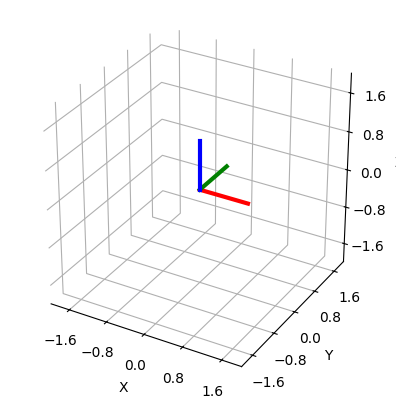

In [11]:
ax = pr.plot_basis(R=np.eye(3), ax_s=2, lw=3)  # 绘制旋转矩阵的基础 ax_s:缩放新的 matplotlib 3d 轴

R:
 [[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
p:
 [1. 1. 1.]


/tmp/ipykernel_20294/4117282181.py:7: DeprecationWarning: function is deprecated, use matrix_from_euler
  R = pr.active_matrix_from_intrinsic_euler_xyz(euler)  # R(z,pi)根据固有 xyz Cardan 角计算主动旋转矩阵。


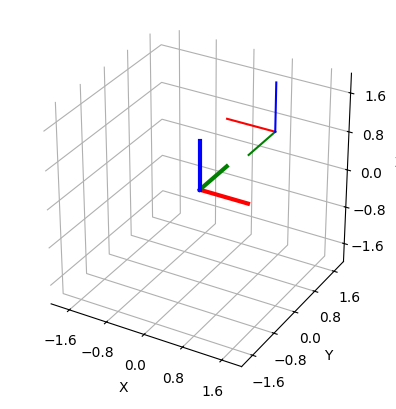

In [13]:
ax = pr.plot_basis(R=np.eye(3), ax_s=2, lw=3) 
axis = 2
angle = np.pi
p = np.array([1.0, 1.0, 1.0])
euler = [0, 0, 0]
euler[axis] = angle
R = pr.active_matrix_from_intrinsic_euler_xyz(euler)  # R(z,pi)根据固有 xyz Cardan 角计算主动旋转矩阵。
# R = pr.matrix_from_euler(euler)  # R(z,pi)根据固有 xyz Cardan 角计算主动旋转矩阵。
pr.plot_basis(ax, R, p)

print('R:\n', np.around(R, decimals=2))
print('p:\n', np.around(p, decimals=2))

R:
 [[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
p:
 [-1.  1.  1.]


/tmp/ipykernel_20294/318437611.py:6: DeprecationWarning: function is deprecated, use matrix_from_euler
  R = pr.active_matrix_from_intrinsic_euler_zyx(euler)  # R(z,pi)


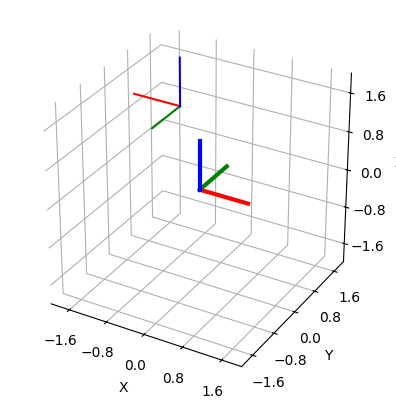

In [14]:
# R(z,pi)
ax = pr.plot_basis(R=np.eye(3), ax_s=2, lw=3) 
p = np.array([-1.0, 1.0, 1.0])
euler = [0, 0, 0]
euler[2 - axis] = angle
R = pr.active_matrix_from_intrinsic_euler_zyx(euler)  # R(z,pi)
pr.plot_basis(ax, R, p)

print('R:\n', np.around(R, decimals=2))
print('p:\n', np.around(p, decimals=2))

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

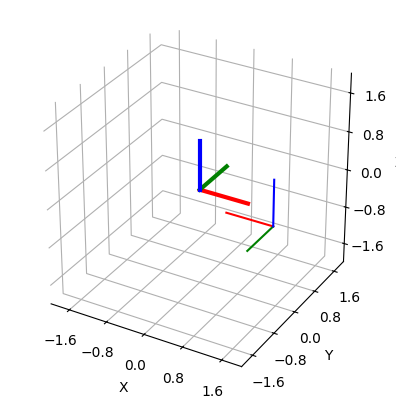

In [5]:
ax = pr.plot_basis(R=np.eye(3), ax_s=2, lw=3) 
p = np.array([1.0, 1.0, -1.0])
R = pr.active_matrix_from_angle(axis, angle)  # 根据围绕基向量的旋转计算主动旋转矩阵。R(z,pi)
#pytransform3d.rotations.active_matrix_from_angle(basis, angle) basis:basis
pr.plot_basis(ax, R, p)

R:
 [[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
[array([1., 0., 0.]), array([0., 1., 0.]), array([0., 0., 1.])]
[2]
[0.         0.         1.         3.14159265]


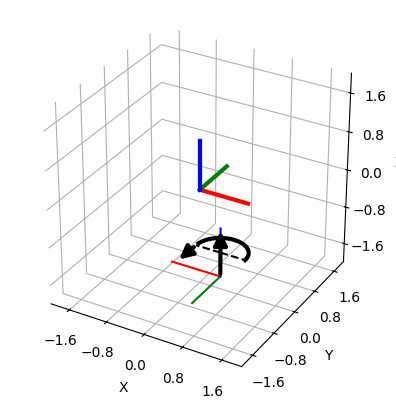

In [30]:
ax = pr.plot_basis(R=np.eye(3), ax_s=2, lw=3) 
p = np.array([1.0, -1.0, -1.0])
e = [pr.unitx, pr.unity, pr.unitz][axis]  # 选择z轴单位向量
a = np.hstack((e, (angle,)))  # 轴角
R = pr.matrix_from_axis_angle(a)  # 旋转矩阵
pr.plot_basis(ax, R, p)
pr.plot_axis_angle(ax, a, p)  # 绘制旋转轴和旋转角度。

print('R:\n', np.around(R, decimals=2))
print([pr.unitx, pr.unity, pr.unitz])
print([axis])
print(a)

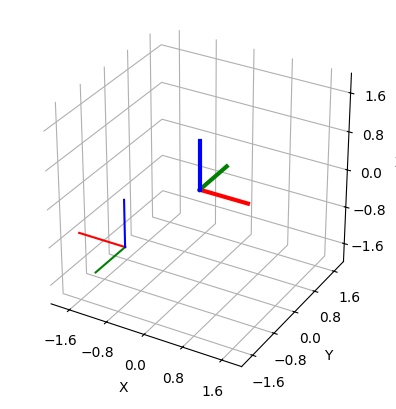

R:
 [[-1. -0.  0.]
 [ 0. -1.  0.]
 [ 0.  0.  1.]]
p:
 [-1. -1. -1.]
q:
 [0. 0. 0. 1.]


In [33]:
ax = pr.plot_basis(R=np.eye(3), ax_s=2, lw=3) 
p = np.array([-1.0, -1.0, -1.0])
q = pr.quaternion_from_axis_angle(a)  # 从轴角获取四元数
R = pr.matrix_from_quaternion(q)  # 旋转矩阵 R(z,pi)
pr.plot_basis(ax, R, p)

plt.show()

print('R:\n', np.around(R, decimals=2))
print('p:\n', np.around(p, decimals=2))
print('q:\n', np.around(q, decimals=2))

In [40]:
Rz = pr.active_matrix_from_angle(2, np.pi)
Ry = pr.active_matrix_from_angle(1, 0)
Rx = pr.active_matrix_from_angle(0, np.deg2rad(15))
R = Rz.dot(Ry.dot(Rx))
print(np.around(R, decimals=2))

[[-1.   -0.    0.  ]
 [ 0.   -0.97  0.26]
 [ 0.    0.26  0.97]]
